In [1]:
pip install pandas scikit-learn matplotlib seaborn ipywidgets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

C:\Users\Dell\AppData\Local\Temp\ipykernel_45984\2586157881.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the Excel file
file_path = 'Iris Flower.xlsx'  # Make sure the file is uploaded in the Project Folder
df = pd.read_excel(file_path)

In [4]:
# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Drop the 'Id' column as it is not needed for the classification
df.drop(columns=['Id'], inplace=True)

In [6]:
# Encode the target variable 'Species'
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [7]:
# Split the data into features and target variable
X = df.drop(columns=['Species'])
y = df['Species']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
print(f'Accuracy: {accuracy:.2f}%')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


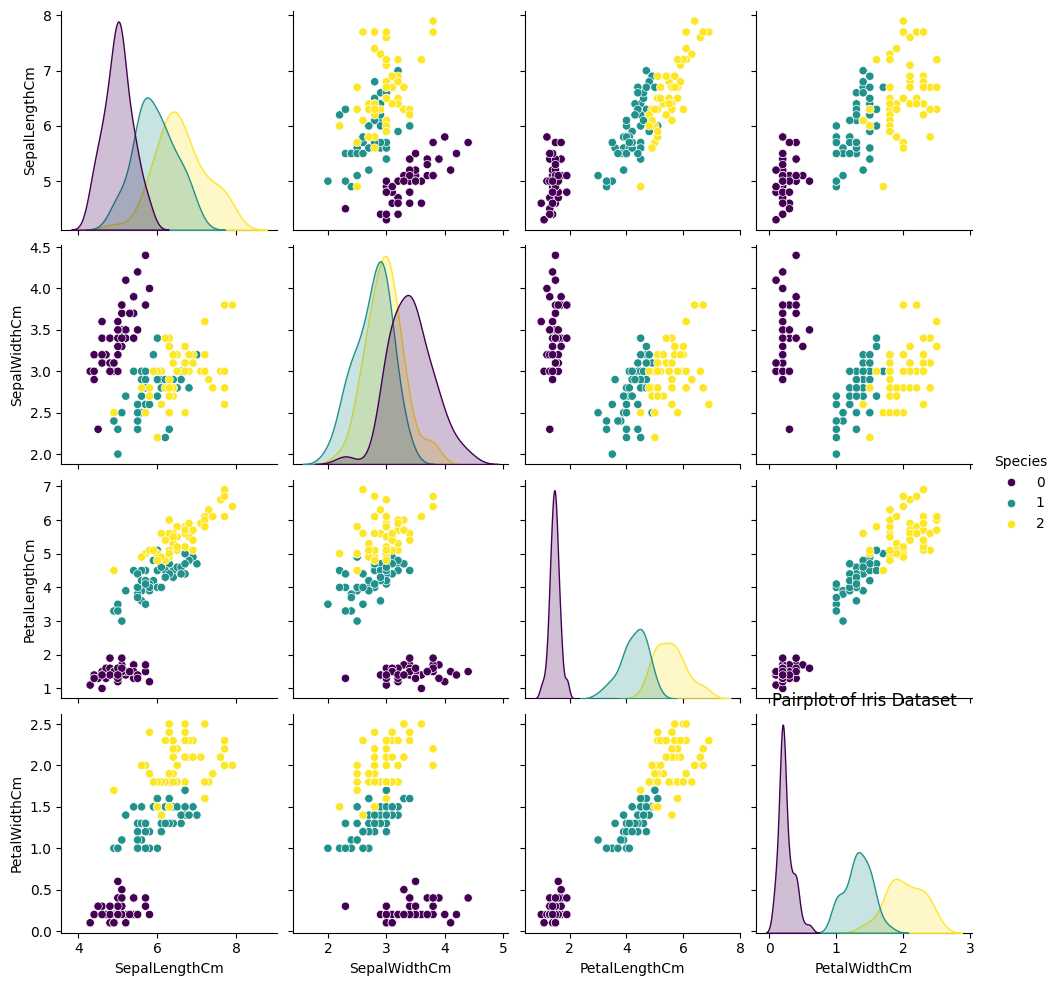

In [13]:
# Plotting
# Pairplot of the Iris dataset
sns.pairplot(df, hue='Species', palette='viridis')
plt.title('Pairplot of Iris Dataset')
plt.show()

In [14]:
# Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

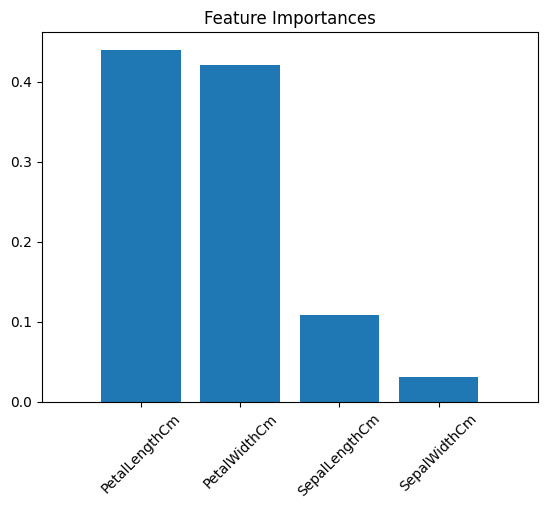

In [15]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

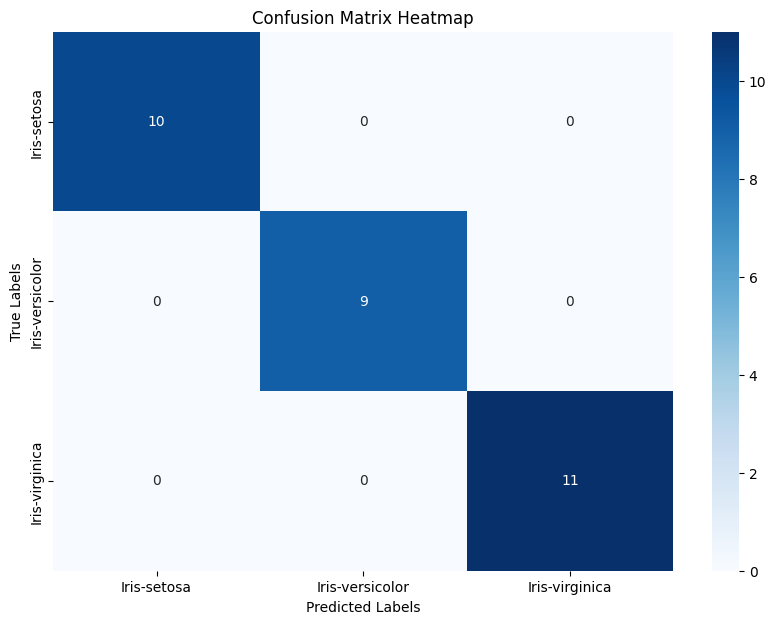

In [16]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
# Function to make predictions on new data
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    new_data = pd.DataFrame({
        'SepalLengthCm': [sepal_length],
        'SepalWidthCm': [sepal_width],
        'PetalLengthCm': [petal_length],
        'PetalWidthCm': [petal_width]
    })
    prediction = model.predict(new_data)
    species = label_encoder.inverse_transform(prediction)
    return species[0]

In [18]:
# Create interactive widgets for user input
def interactive_predict(sepal_length, sepal_width, petal_length, petal_width):
    predicted_species = predict_species(sepal_length, sepal_width, petal_length, petal_width)
    print(f'The predicted species for the input measurements is: {predicted_species}')

interact(interactive_predict,
         sepal_length=widgets.FloatSlider(min=0, max=10, step=0.1, value=5.1),
         sepal_width=widgets.FloatSlider(min=0, max=10, step=0.1, value=3.5),
         petal_length=widgets.FloatSlider(min=0, max=10, step=0.1, value=1.4),
         petal_width=widgets.FloatSlider(min=0, max=10, step=0.1, value=0.2));

interactive(children=(FloatSlider(value=5.1, description='sepal_length', max=10.0), FloatSlider(value=3.5, des…